In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

import requests
pd.set_option('display.max_columns', None) # So we can see all columns in a wide DataFrame
import time 

# Creating Dataset to Csv File From NBA Stats Link

We need to get the data from nba stats web page. 

Note: You can skip the step of creating the file by going to the "Upload Dataset From csv File" step.

In [2]:
dataset_url = 'https://stats.nba.com/stats/leagueLeaders?LeagueID=00&PerMode=Totals&Scope=S&Season=2018-19&SeasonType=Regular%20Season&StatCategory=PTS'

In [3]:
req = requests.get(url=dataset_url).json()
req

{'resource': 'leagueleaders',
 'parameters': {'LeagueID': '00',
  'PerMode': 'Totals',
  'StatCategory': 'PTS',
  'Season': '2018-19',
  'SeasonType': 'Regular Season',
  'Scope': 'S',
  'ActiveFlag': None},
 'resultSet': {'name': 'LeagueLeaders',
  'headers': ['PLAYER_ID',
   'RANK',
   'PLAYER',
   'TEAM_ID',
   'TEAM',
   'GP',
   'MIN',
   'FGM',
   'FGA',
   'FG_PCT',
   'FG3M',
   'FG3A',
   'FG3_PCT',
   'FTM',
   'FTA',
   'FT_PCT',
   'OREB',
   'DREB',
   'REB',
   'AST',
   'STL',
   'BLK',
   'TOV',
   'PF',
   'PTS',
   'EFF',
   'AST_TOV',
   'STL_TOV'],
  'rowSet': [[201935,
    1,
    'James Harden',
    1610612745,
    'HOU',
    78,
    2867,
    843,
    1909,
    0.442,
    378,
    1028,
    0.368,
    754,
    858,
    0.879,
    66,
    452,
    518,
    586,
    158,
    58,
    387,
    244,
    2818,
    2581,
    1.51,
    0.41],
   [202331,
    2,
    'Paul George',
    1610612760,
    'OKC',
    77,
    2841,
    707,
    1614,
    0.438,
    292,
    757,


In [4]:
table_headers = req['resultSet']['headers']

In [5]:
df_cols = ['Year','Season_type'] + table_headers

In [6]:
pd.DataFrame(columns = df_cols)

,Year,Season_type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV


In [7]:
df = pd.DataFrame(columns = df_cols)
season_types = ['Regular%20Season','Playoffs']
years = ['2021-22','2022-23']

begin_loop = time.time()

for y in years:
    for s in season_types:
        api_url = 'https://stats.nba.com/stats/leagueLeaders?LeagueID=00&PerMode=Totals&Scope=S&Season='+y+'&SeasonType='+s+'&StatCategory=PTS'
        r = requests.get(url=api_url).json()
        
        # Getting data into temp_df1 dataframe
        temp_df1 = pd.DataFrame(r['resultSet']['rowSet'], columns = table_headers)
        
        # Year and season type information of the data received in the temp_df2 dataframe is kept
        temp_df2 = pd.DataFrame({'Year' : [y for i in range(len(temp_df1))],
                         'Season_type': [s for i in range(len(temp_df1))]})
        
        # Merging temp_df1 and temp_df2 dataframes
        temp_df3 = pd.concat([temp_df2,temp_df1], axis=1)
        
        # Seasons are added to df along with their column names in each loop.
        df = pd.concat([df, temp_df3], axis=0)
        
        # Requests to the url are sent suddenly and in order not to be blocked, 
        # a random second is waited between 5 and 15 seconds and the loop runs again.
        lag = np.random.uniform(low=5,high=15)        
        time.sleep(lag)

# We create csv files of the data we want to use with the name 'nba_player_data.csv'

# We have created our file before, we do not need to run the following line of code.
# If you want to recreate the file, the comment line can be removed.

df.to_csv('nba_player_data.csv', index=False)

In [8]:
df

,Year,Season_type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,2021-22,Regular%20Season,1629027,1,Trae Young,1610612737,ATL,76,2652,711,1544,0.460,233,610,0.382,500,553,0.904,50,234,284,737,72,7,303,128,2155,2066,2.43,0.24
1,2021-22,Regular%20Season,201942,2,DeMar DeRozan,1610612741,CHI,76,2743,774,1535,0.504,50,142,0.352,520,593,0.877,56,336,392,374,68,24,181,178,2118,1961,2.07,0.38
2,2021-22,Regular%20Season,203954,3,Joel Embiid,1610612755,PHI,68,2296,666,1334,0.499,93,251,0.371,654,803,0.814,146,650,796,284,77,99,214,181,2079,2304,1.33,0.36
3,2021-22,Regular%20Season,1628369,4,Jayson Tatum,1610612738,BOS,76,2731,708,1564,0.453,230,651,0.353,400,469,0.853,85,524,609,334,75,49,217,174,2046,1971,1.54,0.35
4,2021-22,Regular%20Season,203999,5,Nikola Jokic,1610612743,DEN,74,2476,764,1311,0.583,97,288,0.337,379,468,0.810,206,813,1019,584,109,63,281,191,2004,2862,2.08,0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,2022-23,Playoffs,203648,194,Thanasis Antetokounmpo,1610612749,MIL,2,5,0,0,0.000,0,0,0.000,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0.00,0.00
213,2022-23,Playoffs,1628418,194,Thomas Bryant,1610612743,DEN,1,1,0,0,0.000,0,0,0.000,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0.00,0.00
214,2022-23,Playoffs,2617,194,Udonis Haslem,1610612748,MIA,2,3,0,3,0.000,0,1,0.000,0,0,0.000,0,1,1,0,0,0,0,0,0,-2,0.00,0.00
215,2022-23,Playoffs,1628427,194,Vlatko Cancar,1610612743,DEN,5,10,0,5,0.000,0,4,0.000,0,0,0.000,0,3,3,1,0,0,0,0,0,-1,0.00,0.00


## Data Descriptions

The screenshot below was taken from the link (https://www.nba.com/stats/leaders?Season=2018-19&PerMode=Totals&SeasonType=Regular+Season).

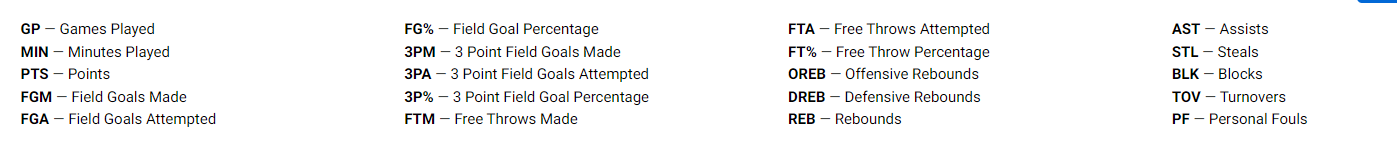

# Upload Dataset From csv File

In [9]:
data = pd.read_csv('nba_player_data.csv')

## Data Cleaning

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1578 entries, 0 to 1577
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         1578 non-null   object 
 1   Season_type  1578 non-null   object 
 2   PLAYER_ID    1578 non-null   int64  
 3   RANK         1578 non-null   int64  
 4   PLAYER       1578 non-null   object 
 5   TEAM_ID      1578 non-null   int64  
 6   TEAM         1578 non-null   object 
 7   GP           1578 non-null   int64  
 8   MIN          1578 non-null   int64  
 9   FGM          1578 non-null   int64  
 10  FGA          1578 non-null   int64  
 11  FG_PCT       1578 non-null   float64
 12  FG3M         1578 non-null   int64  
 13  FG3A         1578 non-null   int64  
 14  FG3_PCT      1578 non-null   float64
 15  FTM          1578 non-null   int64  
 16  FTA          1578 non-null   int64  
 17  FT_PCT       1578 non-null   float64
 18  OREB         1578 non-null   int64  
 19  DREB  

In [11]:
data.isna().sum()

Year           0
Season_type    0
PLAYER_ID      0
RANK           0
PLAYER         0
TEAM_ID        0
TEAM           0
GP             0
MIN            0
FGM            0
FGA            0
FG_PCT         0
FG3M           0
FG3A           0
FG3_PCT        0
FTM            0
FTA            0
FT_PCT         0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
PF             0
PTS            0
EFF            0
AST_TOV        0
STL_TOV        0
dtype: int64

In [12]:
data.head()

,Year,Season_type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,2021-22,Regular%20Season,1629027,1,Trae Young,1610612737,ATL,76,2652,711,1544,0.460,233,610,0.382,500,553,0.904,50,234,284,737,72,7,303,128,2155,2066,2.43,0.24
1,2021-22,Regular%20Season,201942,2,DeMar DeRozan,1610612741,CHI,76,2743,774,1535,0.504,50,142,0.352,520,593,0.877,56,336,392,374,68,24,181,178,2118,1961,2.07,0.38
2,2021-22,Regular%20Season,203954,3,Joel Embiid,1610612755,PHI,68,2296,666,1334,0.499,93,251,0.371,654,803,0.814,146,650,796,284,77,99,214,181,2079,2304,1.33,0.36
3,2021-22,Regular%20Season,1628369,4,Jayson Tatum,1610612738,BOS,76,2731,708,1564,0.453,230,651,0.353,400,469,0.853,85,524,609,334,75,49,217,174,2046,1971,1.54,0.35
4,2021-22,Regular%20Season,203999,5,Nikola Jokic,1610612743,DEN,74,2476,764,1311,0.583,97,288,0.337,379,468,0.810,206,813,1019,584,109,63,281,191,2004,2862,2.08,0.39


In [13]:
# İşe yaramayan sütunları ve türetilmiş özellikleri çıkarma
useless_columns = ['Year', 'Season_type', 'PLAYER_ID', 'RANK', 'PLAYER', 'TEAM_ID', 'TEAM', 'EFF', 'AST_TOV', 'STL_TOV']
data.drop(columns=useless_columns, inplace=True)

In [14]:
data.head()

,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,76,2652,711,1544,0.460,233,610,0.382,500,553,0.904,50,234,284,737,72,7,303,128,2155
1,76,2743,774,1535,0.504,50,142,0.352,520,593,0.877,56,336,392,374,68,24,181,178,2118
2,68,2296,666,1334,0.499,93,251,0.371,654,803,0.814,146,650,796,284,77,99,214,181,2079
3,76,2731,708,1564,0.453,230,651,0.353,400,469,0.853,85,524,609,334,75,49,217,174,2046
4,74,2476,764,1311,0.583,97,288,0.337,379,468,0.810,206,813,1019,584,109,63,281,191,2004


In [15]:
data.shape

(1578, 20)

## Clustering & Scaling

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
selected_features = ['MIN', 'PTS']
selected_data = data[selected_features]

In [32]:
# Veri setini standartlaştırma
scaler = StandardScaler()
scaled_selected_data = scaler.fit_transform(selected_data)

### K-Means & DBSCAN

In [33]:
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt

In [34]:
# KMeans ile kümeleme
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_selected_data)


Text(0, 0.5, 'PTS (Points)')

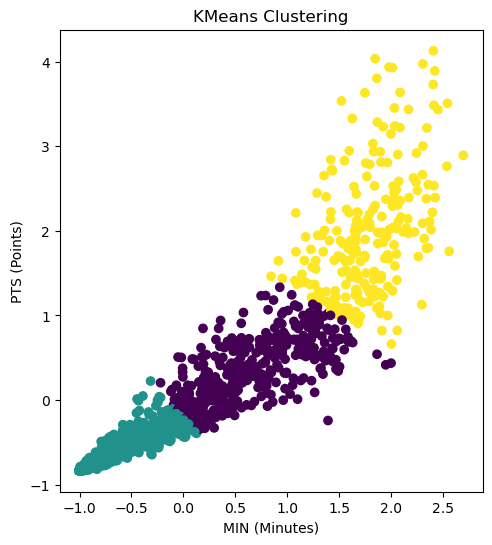

In [35]:
# Görselleştirme
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(scaled_selected_data[:, 0], scaled_selected_data[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('MIN (Minutes)')
plt.ylabel('PTS (Points)')


In [56]:
from sklearn.metrics import silhouette_score

db_param_options = [[0.1, 5], [0.15, 7], [1.0, 15], [0.05, 7], [0.25, 5], [0.35, 9]]
for ep,min_sample in db_param_options:
    
    # Generate clusters using DBSCAN
    db = DBSCAN(eps=ep, min_samples = min_sample)
    db_clusters = db.fit_predict(scaled_selected_data)
    
    # Check if only one cluster is found
    if len(np.unique(db_clusters)) > 1:
        print("Eps: ", ep, "Min Samples: ", min_sample)
        print("DBSCAN Clustering: ", silhouette_score(scaled_selected_data, db_clusters))
    else:
        print("Eps: ", ep, "Min Samples: ", min_sample)
        print("DBSCAN Clustering: Only one cluster found, silhouette score cannot be computed.")

Eps:  0.1 Min Samples:  5
DBSCAN Clustering:  0.2850134575284276
Eps:  0.15 Min Samples:  7
DBSCAN Clustering:  0.3897790373005192
Eps:  1.0 Min Samples:  15
DBSCAN Clustering: Only one cluster found, silhouette score cannot be computed.
Eps:  0.05 Min Samples:  7
DBSCAN Clustering:  0.19156372109971687
Eps:  0.25 Min Samples:  5
DBSCAN Clustering:  0.5005823125555706
Eps:  0.35 Min Samples:  9
DBSCAN Clustering:  0.5739374778666675


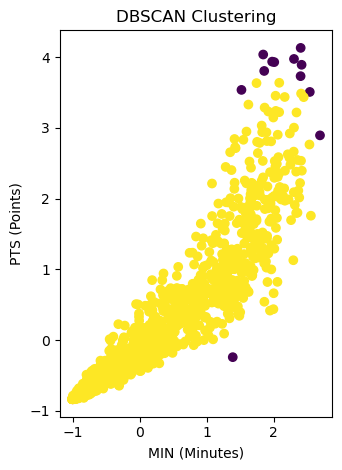

In [61]:
# DBSCAN ile kümeleme
dbscan = DBSCAN(eps=0.35, min_samples=9)
dbscan_labels = dbscan.fit_predict(scaled_selected_data)


plt.subplot(1, 2, 2)
plt.scatter(scaled_selected_data[:, 0], scaled_selected_data[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('MIN (Minutes)')
plt.ylabel('PTS (Points)')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import AgglomerativeClustering

# K-medoids ile kümeleme
kmedoids = KMedoids(n_clusters=3, random_state=42)
kmedoids_labels = kmedoids.fit_predict(scaled_selected_data)

# Hiyerarşik Kümeleme ile kümeleme
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(scaled_selected_data)

# Görselleştirme
plt.figure(figsize=(12, 6))

# K-medoids
plt.subplot(1, 2, 1)
plt.scatter(scaled_selected_data[:, 0], scaled_selected_data[:, 1], c=kmedoids_labels, cmap='viridis')
plt.title('KMedoids Clustering')
plt.xlabel('MIN (Minutes)')
plt.ylabel('PTS (Points)')

# Hiyerarşik Kümeleme
plt.subplot(1, 2, 2)
plt.scatter(scaled_selected_data[:, 0], scaled_selected_data[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('MIN (Minutes)')
plt.ylabel('PTS (Points)')

plt.tight_layout()
plt.show()

Veri seti https://finance.yahoo.com/quote/CSV/history/ linki uzerinden 1 yillik veriler olarak alinmistir. burada Carriage Services, Inc. (CSV) sirketnin verileri listelenmektedir. Doysa adi 'CSV' olarak download edilmektedir.

^IXIC.csv

https://finance.yahoo.com/quote/%5EIXIC/history?period1=1680739200&period2=1712361600&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

In [ ]:
stocks_df = pd.read_csv('^IXIC.csv')

stocks_df.head(-5)

In [ ]:
stocks_df.shape

In [ ]:
stocks_df.info()

In [ ]:
stocks_df.describe()

1 yillik gunluk olarak verilen acilis ve kapanis verileri gorsellestirelim.

In [ ]:
import matplotlib.pyplot as plt

# Veri setini yükleme (örnek olarak veri seti adı 'df' olarak kabul edilmiştir)
# df = pd.read_csv('veri_seti.csv')

# 'Date' sütununu datetime formatına çevirme
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])

# 'Date' sütununu indeks olarak ayarlama
stocks_df.set_index('Date', inplace=True)

# Yıl içindeki değişen açılış ve kapanış fiyatlarını görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(stocks_df['Open'], label='Opening Price')
plt.plot(stocks_df['Close'], label='Closing Price', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Opening and Closing Prices Changing During the Year')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
import seaborn as sns

# Hacimdeki değişimleri gösteren grafik
plt.figure(figsize=(10, 6))
plt.plot(stocks_df.index, stocks_df['Volume'], label='İşlem Hacmi')
plt.xlabel('Tarih')
plt.ylabel('İşlem Hacmi')
plt.title('Tarih vs. İşlem Hacmi Grafiği')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Hacimdeki anormallikler
plt.figure(figsize=(10, 6))
sns.boxplot(data=stocks_df[['Volume']])
plt.xlabel('İşlem Hacmi')
plt.title('İşlem Hacmi Dağılımı')
plt.show()


## Scaling
Clustering metodlari cok hassas ayarlamalar yapilmasi gerektigi icin scaling yapmak gerek. goruldugu gibi volume ve diger stunlardaki degerler birbirlerine cok uzak.

In [ ]:
stocks_df.head()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(stocks_df)

In [ ]:
scaled_data

# Clusterin Methods

## K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 38)

cluster_labels = kmeans.fit_predict(scaled_data)


In [ ]:
cluster_labels

In [ ]:
plt.figure(figsize=(8, 6))

# Visualising the clusters using scatter() method
plt.scatter(scaled_data[cluster_labels == 0, 0], scaled_data[cluster_labels == 0, 1], s = 10, c = 'red', label = 'Cluster 0')
plt.scatter(scaled_data[cluster_labels == 1, 0], scaled_data[cluster_labels == 1, 1], s = 10, c = 'blue', label = 'Cluster 1')
plt.scatter(scaled_data[cluster_labels == 2, 0], scaled_data[cluster_labels == 2, 1], s = 10, c = 'green', label = 'Cluster 2')
plt.scatter(scaled_data[cluster_labels == 3, 0], scaled_data[cluster_labels == 3, 1], s = 10, c = 'black', label = 'Cluster 3')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'yellow', label = 'Centroids')
plt.xlabel('mean_dist_day')
plt.ylabel('mean_over_speed_perc')

# A legend is an area describing the elements of the graph. In the matplotlib library, there's a function called legend() 
# which is used to Place a legend on the axes.
plt.legend( loc ="best") 

In [ ]:
# import silhouette score from sklearn library
from sklearn.metrics import silhouette_score

# Display the silhouette score values
print(f'Silhouette Score(n = 3): {silhouette_score(scaled_data, cluster_labels)}')

In [ ]:
#Finding the optimum number of clusters for k-means classification

wcss = []                  # Declare an array

# Set the loop from the minimum and maximum values
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
# inertia_float: Sum of squared distances of samples to their closest cluster center.

# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')    # within cluster sum of squares
plt.show()

In [ ]:
k_range = range(2, 11)  # 2 ila 10 arası küme sayıları için değerlendirme yapılacak

silhouette_scores = []
davies_bouldin_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    
    silhouette = silhouette_score(scaled_data, cluster_labels)
    davies_bouldin = davies_bouldin_score(scaled_data, cluster_labels)
    
    silhouette_scores.append(silhouette)
    davies_bouldin_scores.append(davies_bouldin)

# Sonuçların görselleştirilmesi
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', label='Silhouette Score')
plt.plot(k_range, davies_bouldin_scores, marker='x', label='Davies Bouldin Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Performance Score')
plt.title('Clustering Performance Evaluation')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Choose the optimal number of clusters based on the metrics
optimal_clusters_db = np.argmin(davies_bouldin_scores) + 2  # +2 because the range starts from 2
optimal_clusters_silhouette = np.argmax(silhouette_scores) + 2  # +2 because the range starts from 2

print(f'Optimal Clusters (Davies-Bouldin): {optimal_clusters_db}')
print(f'Optimal Clusters (Silhouette): {optimal_clusters_silhouette}')

In [ ]:
# Function to perform hierarchical clustering and calculate metrics
def perform_clustering(n_clusters, data):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agg_clustering.fit_predict(data)
    db_index = davies_bouldin_score(data, labels)
    silhouette_avg = silhouette_score(data, labels)
    return db_index, silhouette_avg

In [ ]:
stocks_df['Cluster'] = cluster_labels

In [ ]:
stocks_df

**Step 4:** Apply the `linkage()` function to `normalized_movements`, using `'complete'` linkage, to calculate the hierarchical clustering. Assign the result to `mergings`.

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

linked = linkage(scaled_data, method='ward')

In [ ]:
# Dendrogramı görselleştirme
plt.figure(figsize=(15, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean distance')
plt.show()

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Hiyerarşik kümeleme uygulama
linked = linkage(scaled_data, method='ward')

# Dendrogramı görselleştirme
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hiyerarşik Kümeleme Dendrogramı')
plt.xlabel('Veri Noktaları')
plt.ylabel('Uzaklık')
plt.show()


In [ ]:
from sklearn.cluster import DBSCAN

# DBSCAN kümeleme uygulama
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan.fit(scaled_data)
cluster_labels_dbscan = dbscan.labels_

# DBSCAN sonuçlarını görselleştirme
plt.scatter(data['Close'], data['Volume'], c=cluster_labels_dbscan, cmap='viridis')
plt.xlabel('Kapanış Fiyatı')
plt.ylabel('İşlem Hacmi')
plt.title('DBSCAN Kümeleme Sonuçları')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Veri setini yükleme (örnek olarak 'df' adıyla kabul edilmiştir)
# df = pd.read_csv('veri_seti.csv')

# 'Close' sütununu zaman serisi olarak ayarlama
ts = stocks_df['Close'].dropna()

# ARIMA modeli uygulama
model = ARIMA(ts, order=(5, 1, 0))  # p=5, d=1, q=0
results = model.fit()

# Model sonuçlarını görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Gerçek Veri')
plt.plot(results.fittedvalues, color='red', label='Tahminler')
plt.title('ARIMA Modeli ile Kapanış Fiyatı Tahminleri')
plt.xlabel('Tarih')
plt.ylabel('Kapanış Fiyatı')
plt.legend()
plt.show()

# Modelin performansını değerlendirme
mse = mean_squared_error(ts, results.fittedvalues)
print(f"Ortalama Kare Hata (MSE): {mse}")


In [ ]:
# ARIMA modelini uygulama
model = ARIMA(ts, order=(5, 1, 0))  # p=5, d=1, q=0
results = model.fit()

# Gelecek zaman dilimleri için tahmin yapma
forecast_steps = 10  # Örnek olarak, 10 adet gelecek zaman dilimi için tahmin yapalım
forecast = results.forecast(steps=forecast_steps)

# Tahmin edilen değerleri görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Gerçek Veri')
plt.plot(results.fittedvalues, color='red', label='Eğitilen Model')
plt.plot(forecast, color='green', label='Gelecek Tahminler')
plt.title('ARIMA Modeli ile Gelecek Kapanış Fiyatı Tahminleri')
plt.xlabel('Tarih')
plt.ylabel('Kapanış Fiyatı')
plt.legend()
plt.show()

# Gelecek tahminlerini yazdırma
print("Gelecek Kapanış Fiyatı Tahminleri:")
print(forecast)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Veri setini yükleme ve zaman serisi olarak ayarlama
# Örnek olarak, son 2 haftalık veriyi alalım (varsayılan olarak, son 14 günlük veriyi kullanacağız)
end_date = stocks_df.index[-1]  # Veri setindeki en son tarih
start_date = end_date - pd.DateOffset(days=13)  # Son 2 haftalık dönemi belirleme
ts = stocks_df.loc[start_date:end_date, 'Close']  # Kapanış fiyatlarını zaman serisi olarak alır

# ARIMA modelini uygulama
model = ARIMA(ts, order=(5, 1, 0))  # p=5, d=1, q=0
results = model.fit()

# Gelecek 2 haftalık dönem için tahmin yapma
forecast_steps = 14  # Gelecek 2 hafta için 14 günlük tahmin yapalım
forecast = results.forecast(steps=forecast_steps)

# Tahmin edilen değerleri görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Gerçek Veri')
plt.plot(results.fittedvalues, color='red', label='Eğitilen Model')
plt.plot(forecast, color='green', label='Gelecek Tahminler')
plt.title('Son 2 Haftalık ARIMA Modeli ile Kapanış Fiyatı Tahminleri')
plt.xlabel('Tarih')
plt.ylabel('Kapanış Fiyatı')
plt.legend()
plt.show()

# Gelecek tahminlerini yazdırma
print("Gelecek 2 Haftalık Kapanış Fiyatı Tahminleri:")
print(forecast)
